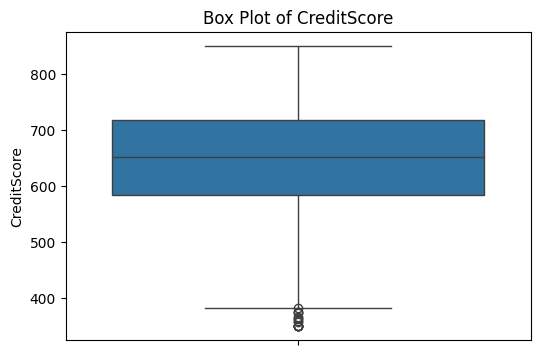

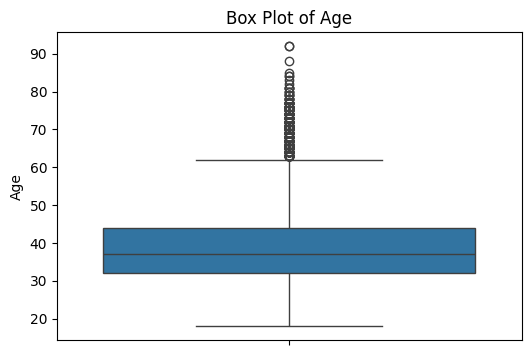

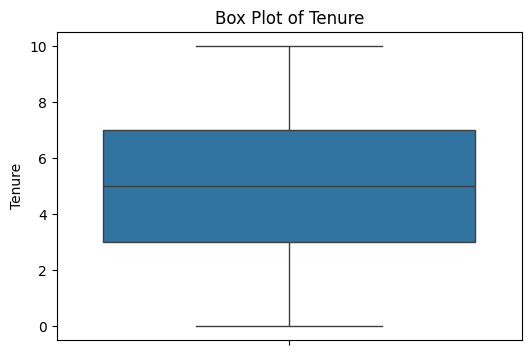

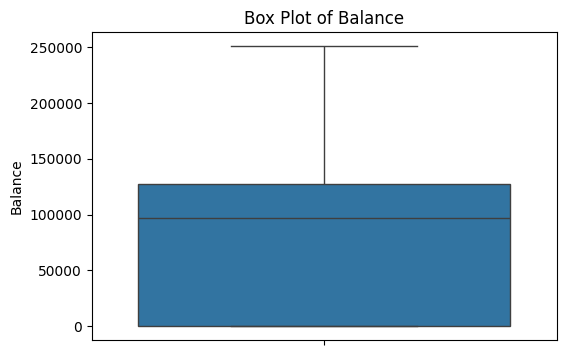

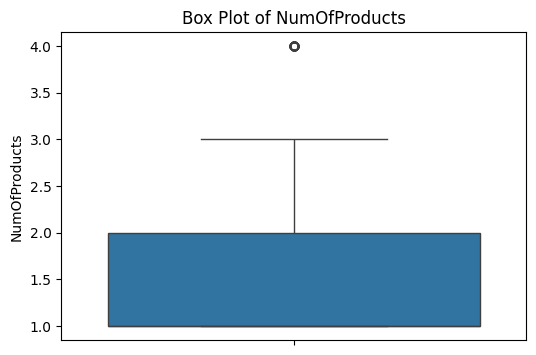

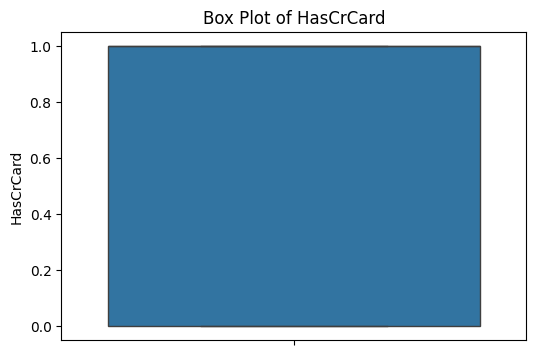

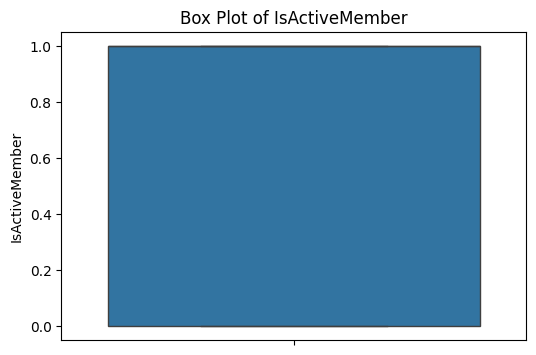

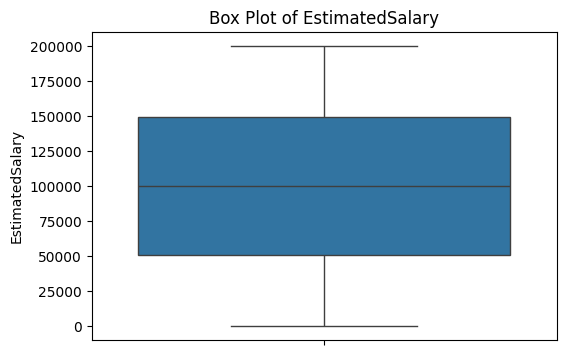

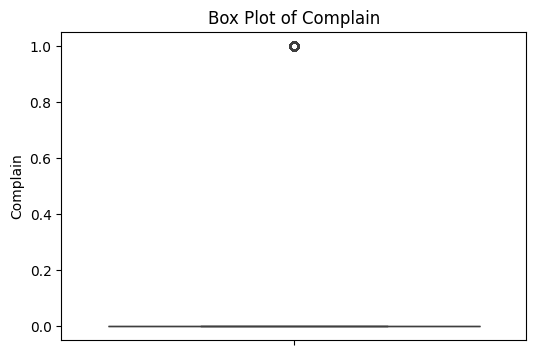

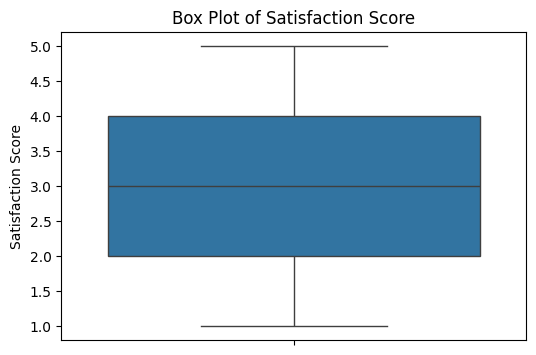

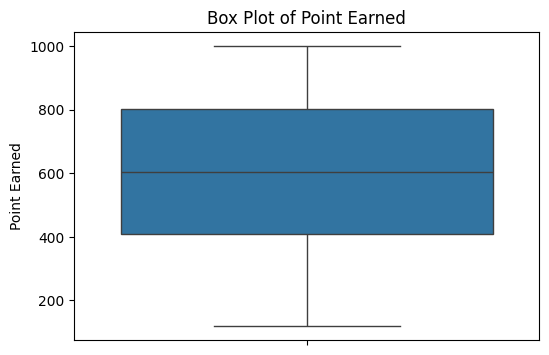

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/content/Bank-Customer-Attrition-Insights-Data.csv"  # Update with your file path
df = pd.read_csv(file_path)

# Selecting numerical columns for outlier detection
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = [col for col in numerical_cols if col not in ["RowNumber", "CustomerId", "Exited"]]

# Generate separate box plots for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f"Box Plot of {col}")
    plt.show()


In [3]:
# Function to remove outliers using IQR method
def remove_outliers(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Remove outliers
df_clean = remove_outliers(df, numerical_cols)

# Print shape before and after outlier removal
print("Original shape:", df.shape)
print("Shape after outlier removal:", df_clean.shape)


Original shape: (10000, 18)
Shape after outlier removal: (7670, 18)


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Encode categorical features
df = df.drop(columns=["RowNumber", "CustomerId", "Surname"])  # Drop unnecessary columns
df_clean = df_clean.drop(columns=["RowNumber", "CustomerId", "Surname"])

categorical_cols = ["Geography", "Gender", "Card Type"]
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    df_clean[col] = le.transform(df_clean[col])
    label_encoders[col] = le

# Define features and target
X = df.drop(columns=["Exited"])
y = df["Exited"]

X_clean = df_clean.drop(columns=["Exited"])
y_clean = df_clean["Exited"]

# Split datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train_clean = scaler.fit_transform(X_train_clean)
X_test_clean = scaler.transform(X_test_clean)

# Train SVM and RF models on original data
svm_model = SVC()
rf_model = RandomForestClassifier()

svm_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Train SVM and RF models on cleaned data
svm_model_clean = SVC()
rf_model_clean = RandomForestClassifier()

svm_model_clean.fit(X_train_clean, y_train_clean)
rf_model_clean.fit(X_train_clean, y_train_clean)

# Evaluate models
svm_acc = accuracy_score(y_test, svm_model.predict(X_test))
rf_acc = accuracy_score(y_test, rf_model.predict(X_test))
svm_acc_clean = accuracy_score(y_test_clean, svm_model_clean.predict(X_test_clean))
rf_acc_clean = accuracy_score(y_test_clean, rf_model_clean.predict(X_test_clean))

# Print results
print("SVM Accuracy (Original Data):", svm_acc)
print("Random Forest Accuracy (Original Data):", rf_acc)
print("SVM Accuracy (Cleaned Data):", svm_acc_clean)
print("Random Forest Accuracy (Cleaned Data):", rf_acc_clean)


SVM Accuracy (Original Data): 0.999
Random Forest Accuracy (Original Data): 0.999
SVM Accuracy (Cleaned Data): 1.0
Random Forest Accuracy (Cleaned Data): 1.0
